# ■ 수지 사진 resize 하고 흑백처리 (신경망에 입력되기 전 데이터 구성)

## 1. c:\\data 폴더 아래에 a.jpg 를 가져다 둡니다.

## 2. 아나콘다 프롬프트창을 열고 cv2 모듈을 설치합니다.

    pip install opencv-python

## 3. c:\\data 폴더 밑에 있는 파일들의 이름을 불러옵니다.

In [4]:
import  cv2
import  os 
import  numpy  as np

path = "c:\\data\\data10"
file_list = os.listdir(path)  # path 에 지정된 위치에 있는 파일들의 이름을 불러온다.
file_list  

['a.jpg']

## 4. 수지 사진을 resize 합니다.

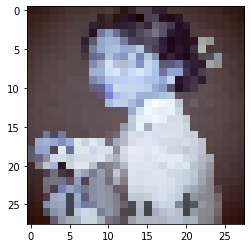

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for k in file_list:  # 리스트 안에 있는 파일들을 하나씩 빼내는 코드
    img = cv2.imread(path + '\\' + k)   # 수지 사진을 숫자행렬로 변경합니다.
                                        
    width, height = img.shape[:2]  # 수지 사진 숫자 행렬에서 가로, 세로 가져온다.
    resize_img = cv2.resize(img, (28 , 28), interpolation=cv2.INTER_CUBIC)
    cv2.imwrite('c:\\data\\data11\\resize\\' + k, resize_img)   # resize 한 이미지를 저장합니다.
    
plt.imshow(resize_img)  # resize 한 수지 사진을 시각화 해라 ~
plt.show()    

## 5. 수지 사진을 흑백으로 변경합니다.

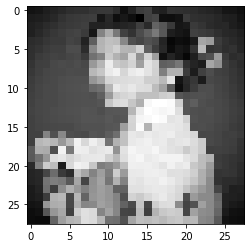

In [6]:
j= 'c:\\data\\data11\\resize\\a.jpg'
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])   # 흑백 변경

img = mpimg.imread(j)
gray = rgb2gray(img)
plt.imshow(gray, cmap = plt.get_cmap('gray'))
plt.show()

In [25]:
gray.shape

(28, 28)

수지 사진을 1차원으로 바꾼다.

In [26]:
gray.shape
x = gray.flatten()
x.shape

(784,)

##  6. 수지 사진을 mnist 신경망에 넣습니다.

In [29]:
import numpy as np
import  pickle
from common import  sigmoid, softmax
from  dataset.mnist  import  load_mnist 

# 1. 파이썬 기초 ---> 2. 함수를 생성 ----> 3. 함수로 클래스를 생성 
class Three_nn():
    import numpy as np
    import  pickle
    from common import  sigmoid, softmax
    from  dataset.mnist  import  load_mnist 
    
    def init_network(self):
        import  pickle
        with  open("c:\\data\\sample_weight.pkl", "rb")  as  f:
            network = pickle.load(f)
        return  network 

    # 1. 데이터를 불러옵니다. ( 얀르쿤 교수님이 만든 필기체 데이터)
    def get_data(self):
        (x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=True,  one_hot_label=False) 
        return  x_train, t_train 

    # 2. 가중치와 바이어스 값을 불러와서 3층 신경망에 흘려보내는 함수 

    def predict(self, network, x):
        #network = init_network()
        w1, w2, w3 = network['W1'], network['W2'], network['W3']
        b1, b2, b3 = network['b1'], network['b2'], network['b3']

        # 3. 신경망을 구성합니다. 
        # 0층
        # x = x_train[0:100]  # 일단 10개의 필기체 데이터를 구성합니다. 
        # 1층
        y = np.dot(x,w1) + b1
        y_hat = sigmoid(y)
        # 2층
        z = np.dot(y_hat, w2) + b2
        z_hat = sigmoid(z)
        # 3층
        k = np.dot(z_hat, w3) + b3
        k_hat =  softmax(k)
        return  k_hat

n1 = Three_nn()  # 객체화 시킨다. 설계도 가지고 제품을 만든다. 

#x, t = n1.get_data()  #  테스트 데이터와 테스트 데이터의 정답을 불러오는 코드
network = n1.init_network()  # 저자가 만들어온 가중치와 바이어스를 불러오는 코드 

result = n1.predict( network, x )
print (np.argmax(result) ) 

3


c:\data\jupyter\deep_learning\2021.03.10\common.py:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x) )


## 문제82. 다른 수지사진을 신경망에 넣고 어떤 숫자가 나오는지 확인하시오 !

In [34]:
import  cv2
import  os 
import  numpy  as np

path = "c:\\data\\data10"
file_list = os.listdir(path)  # path 에 지정된 위치에 있는 파일들의 이름을 불러온다.
file_list  

['b.jpg']

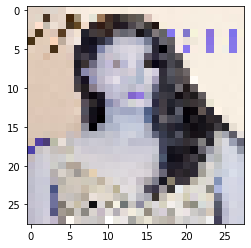

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for k in file_list:  # 리스트 안에 있는 파일들을 하나씩 빼내는 코드
    img = cv2.imread(path + '\\' + k)   # 수지 사진을 숫자행렬로 변경합니다.
                                        #
    width, height = img.shape[:2]  # 수지 사진 숫자 행렬에서 가로, 세로 가져온다.
    resize_img = cv2.resize(img, (28 , 28), interpolation=cv2.INTER_CUBIC)
    cv2.imwrite('c:\\data\\data11\\resize\\' + k, resize_img)   # resize 한 이미지를 저장합니다.
    
plt.imshow(resize_img)  # resize 한 수지 사진을 시각화 해라 ~
plt.show()    

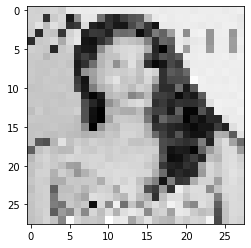

In [37]:
j= 'c:\\data\\data11\\resize\\b.jpg'
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

img = mpimg.imread(j)
gray = rgb2gray(img)
plt.imshow(gray, cmap = plt.get_cmap('gray'))
plt.show()

In [38]:
gray.shape
x = gray.flatten()
x.shape

(784,)

In [39]:
import numpy as np
import  pickle
from common import  sigmoid, softmax
from  dataset.mnist  import  load_mnist 

# 1. 파이썬 기초 ---> 2. 함수를 생성 ----> 3. 함수로 클래스를 생성 
class Three_nn():
    import numpy as np
    import  pickle
    from common import  sigmoid, softmax
    from  dataset.mnist  import  load_mnist 
    
    def  init_network(self):
        import  pickle
        with  open("c:\\data\\sample_weight.pkl", "rb")  as  f:
            network = pickle.load(f)
        return  network 

    # 1. 데이터를 불러옵니다. ( 얀르쿤 교수님이 만든 필기체 데이터)
    def get_data(self):
        (x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=True,  one_hot_label=False) 
        return  x_train, t_train 

    # 2. 가중치와 바이어스 값을 불러와서 3층 신경망에 흘려보내는 함수 

    def predict(self, network, x):
        #network = init_network()
        w1, w2, w3 = network['W1'], network['W2'], network['W3']
        b1, b2, b3 = network['b1'], network['b2'], network['b3']

        # 3. 신경망을 구성합니다. 
        # 0층
        # x = x_train[0:100]  # 일단 10개의 필기체 데이터를 구성합니다. 
        # 1층
        y = np.dot(x,w1) + b1
        y_hat = sigmoid(y)
        # 2층
        z = np.dot(y_hat, w2) + b2
        z_hat = sigmoid(z)
        # 3층
        k = np.dot(z_hat, w3) + b3
        k_hat =  softmax(k)
        return  k_hat

n1 = Three_nn()  # 객체화 시킨다. 설계도 가지고 제품을 만든다. 

#x, t = n1.get_data()  #  테스트 데이터와 테스트 데이터의 정답을 불러오는 코드
network = n1.init_network()  # 저자가 만들어온 가중치와 바이어스를 불러오는 코드 

result = n1.predict( network, x )
print (np.argmax(result) ) 

5


c:\data\jupyter\deep_learning\2021.03.10\common.py:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x) )
